# Preparations
## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from naive_bayes_classifier import NaiveBayes

## Reading the Data

In [2]:
inflammation_data = pd.read_csv('./inflammation_diagnosis.csv', sep=';')

## Inspecting the Data
'Temperature' is the only continuous feature. The other features are all binary.

In [3]:
inflammation_data.head(5)

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


## Inspecting the Dtypes
'Temperature' is a float, the other features are all strings.

In [4]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    object 
 2   lumbar_pain         120 non-null    object 
 3   urine_pushing       120 non-null    object 
 4   micturition_pains   120 non-null    object 
 5   burning_of_urethra  120 non-null    object 
 6   inflammation        120 non-null    object 
 7   nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


# 

## Booleanizing the Binary Features
I used it once and it's a word now 😏

In [5]:
inflammation_data.replace(to_replace={'no': False, 'yes': True}, inplace=True)
inflammation_data

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,False,True,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False
2,35.9,False,True,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False
4,36.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
115,41.4,False,True,True,False,True,False,True
116,41.5,False,False,False,False,False,False,False
117,41.5,True,True,False,True,False,False,True
118,41.5,False,True,True,False,True,False,True


## Creating Disease Labels
Based on the appearance of either inflammation or nephritis

In [6]:
inflammation_data['disease'] = inflammation_data["inflammation"] | inflammation_data["nephritis"]
inflammation_data

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,35.5,False,True,False,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False,True
2,35.9,False,True,False,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False,True
4,36.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
115,41.4,False,True,True,False,True,False,True,True
116,41.5,False,False,False,False,False,False,False,False
117,41.5,True,True,False,True,False,False,True,True
118,41.5,False,True,True,False,True,False,True,True


## Splitting the Data
The data is imbalanced towards diseased patients.

In [7]:
inflammation_data['disease'].value_counts(True)

disease
True     0.75
False    0.25
Name: proportion, dtype: float64

## Stratifying the Split
Explicitly setting fractions for both classes

In [8]:
TRAIN_FRACTION = 0.8

train = pd.concat([inflammation_data[inflammation_data['disease'] == True].sample(frac=TRAIN_FRACTION), inflammation_data[inflammation_data['disease'] == False].sample(frac=TRAIN_FRACTION)])
test = inflammation_data.drop(train.index)

## Proving that no train samples are within the test set
By combining the indices of the train and the test-set and checking for duplicates, we can see whether we have rows in both datasets or not:

In [9]:
indices = train.index.union(test.index)
indices.has_duplicates

False

# Working with the Naive Bayes Classifier
## Creating an instance of NaiveBayes

In [10]:
naive_bayes = NaiveBayes()

## Fitting the training data

In [11]:
naive_bayes.fit(data=train, target_name='disease')

## Evaluating on the test set
### Dividing into features and labels
Before evaluation we first need to divide the test set into features (X) and labels (y)

In [12]:
X_test = test.drop(columns='disease')
y_test = test['disease']

## Evaluating

In [13]:
accuracy, confusion_matrix = naive_bayes.evaluate_on_data(data=X_test, test_labels=y_test)

## Plotting the confusion matrix

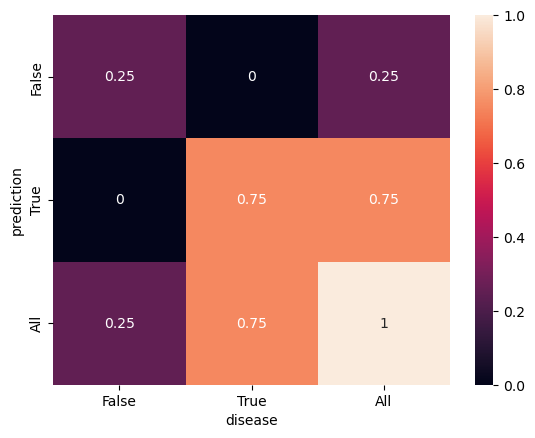

In [15]:
sns.heatmap(data=confusion_matrix, annot=True)
plt.show()

# Clean up below
[ ] Fix the plots

# Plot the data

plot with seaborn, use different colors and sort the values by colors

c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future

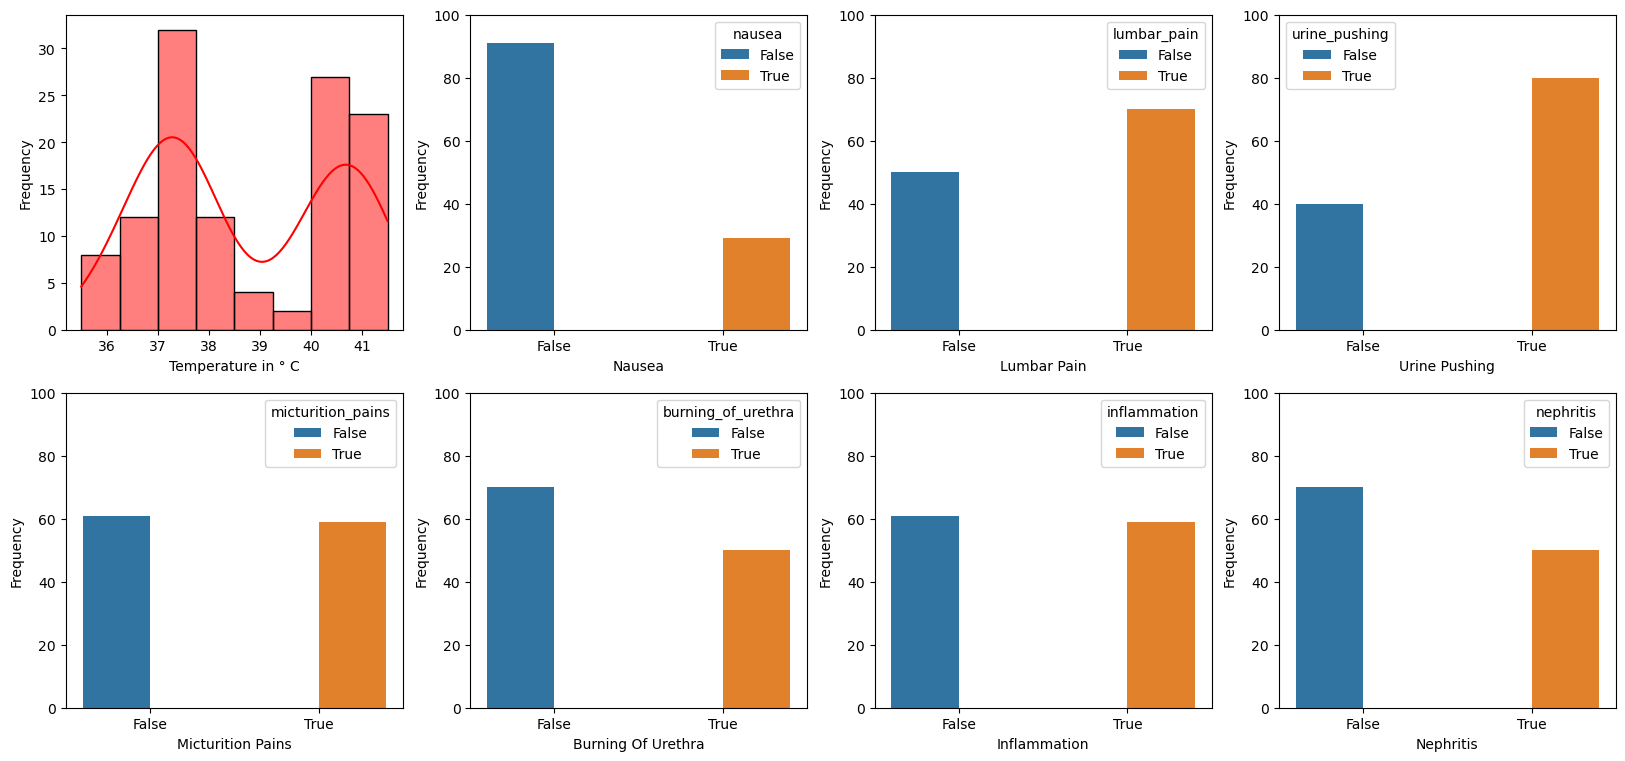

In [14]:
rows = 2
columns = 4
fig,ax = plt.subplots(nrows=rows, ncols=columns, figsize=(20,9))
[""]
index = 0 

for row in range(rows):
    for column in range(columns):
        nice_col_name = inflammation_data.columns.to_list()[index]
        nice_col_name = " ".join(word[0].upper() + word[1:] for word in nice_col_name.split("_"))
        
        
        if inflammation_data.columns[index] == 'temperature':
            s = sns.histplot(inflammation_data, ax=ax[row,column], x=inflammation_data.columns[column], kde=True, color='r')
            s.set(xlabel = 'Temperature in ° C', ylabel = "Frequency")
            
        else:
            b = sns.countplot(inflammation_data, x=inflammation_data.columns[index], ax=ax[row,column], hue=inflammation_data.columns[index])
            b.set(xlabel = nice_col_name, ylabel = 'Frequency')
            b.set_ylim(0,100)
            
        index += 1

c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

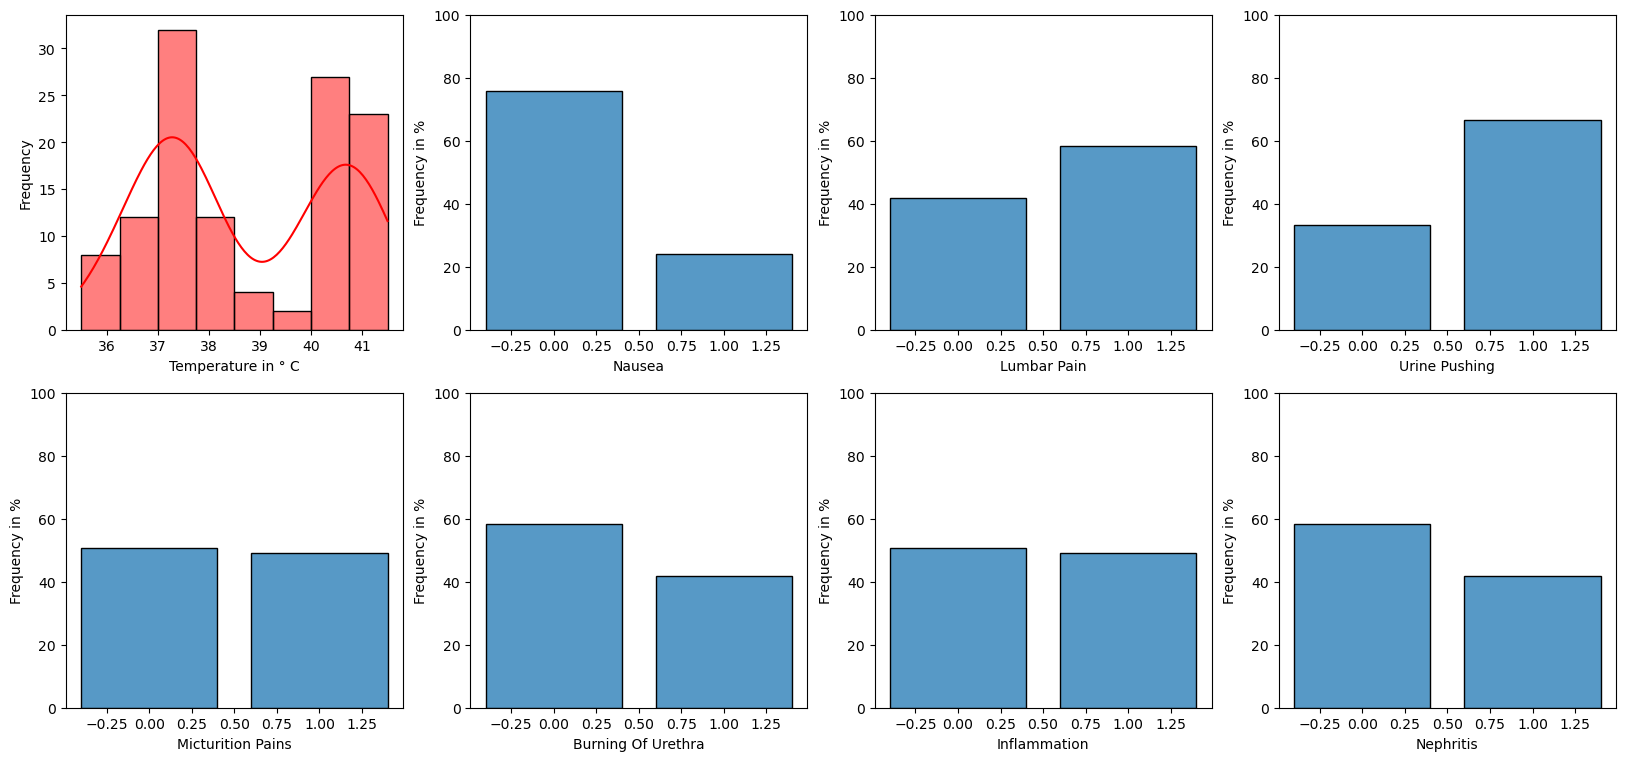

In [15]:
rows = 2
columns = 4
fig,ax = plt.subplots(nrows=rows, ncols=columns, figsize=(20,9))
[""]
index = 0 

for row in range(rows):
    for column in range(columns):
        nice_col_name = inflammation_data.columns.to_list()[index]
        nice_col_name = " ".join(word[0].upper() + word[1:] for word in nice_col_name.split("_"))
        
        
        if inflammation_data.columns[index] == 'temperature':
            s = sns.histplot(inflammation_data, ax=ax[row,column], x=inflammation_data.columns[column], kde=True, color='r')
            s.set(xlabel = 'Temperature in ° C', ylabel = "Frequency")
            
        else:
            b = sns.histplot(inflammation_data, ax=ax[row,column], x=inflammation_data.columns[index], stat='percent', discrete=True, shrink=.8)
            #b = sns.countplot(inflammation_data, x=inflammation_data.columns[index], ax=ax[row,column])
            b.set(xlabel = nice_col_name, ylabel = 'Frequency in %')
            b.set_ylim(0,100)
            
        index += 1

# Temperature distribution by diseased or healthy

From the temperature plot it seems as one could approximate two gaussian distributions that relate to the two categories diseased or healthy. To verify this, we plot the temperature grouped by the status of 'disease':

In [16]:
groupby_disease = inflammation_data[['temperature', 'disease']].groupby('disease')

c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mfaig\anaconda3\envs\ml_practical\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

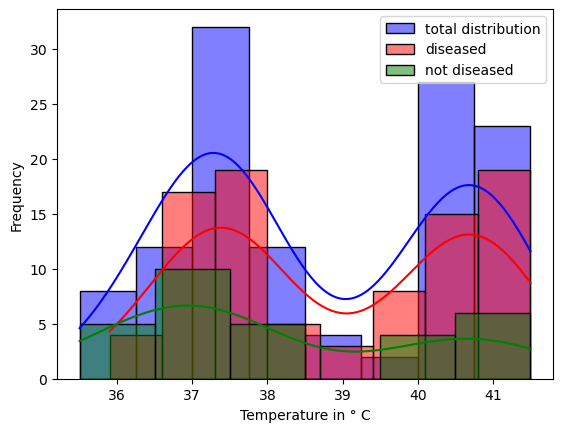

In [17]:
diseased = groupby_disease.get_group(name=True)
healthy = groupby_disease.get_group(name=False)

sns.histplot(data=inflammation_data, x=inflammation_data['temperature'], bins=8, label='total distribution', color='b', kde=True)
sns.histplot(data=diseased, x=diseased['temperature'], label='diseased', color='r', kde=True)
sns.histplot(data=healthy, x=healthy['temperature'], label='not diseased', color='g', kde=True)

plt.ylabel('Frequency')
plt.xlabel('Temperature in ° C')

plt.legend()
plt.show()

It seems that, unlike expected from the total distribution, there are no two guassian distributions for diseased and healthy patients. One could assume such a distribution, as an elevated temperature is a typical sign for inflammation. However, looking only at inflammation and nephritis (out of which we generate the disease-column) and temperature, it is visible that there are multiple cases in which relatively low temperatures were measured for patients with either general inflammation or nephritis.

In [18]:
test = inflammation_data[['inflammation', 'nephritis', 'temperature']].sort_values(by='temperature')
print(test[(test.inflammation==True) | (test.nephritis==True)])

     inflammation  nephritis  temperature
1            True      False         35.9
3            True      False         36.0
6            True      False         36.2
8            True      False         36.3
9            True      False         36.6
..            ...        ...          ...
114          True       True         41.3
115         False       True         41.4
118         False       True         41.5
117         False       True         41.5
119         False       True         41.5

[90 rows x 3 columns]


# Drop duplicates to avoid the same patients for training and test set

<hr>
<h1> Think about when do drop data.....nicht, dass es was an der Wahrscheinlichkeit ändert
<br>
<hr>

In [19]:
#inflammation_data = inflammation_data.drop_duplicates()

## Ensuring that the two dataframes do not share a column
The following merge shows duplicate rows across the two dataframes. If empty, there are no duplicates.

In [20]:
set(list(test.index)).isdisjoint(list(train.index))

False

# Shows same values for training and test set, this are not the same patiens, just patients with the same values 

In [21]:
result = train.merge(right=test, how='inner', indicator=False)
result

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,37.3,False,False,True,False,False,True,False,True
1,37.3,False,False,True,False,False,True,False,True
2,39.4,False,True,True,False,True,False,True,True
3,37.9,False,False,True,False,False,True,False,True
4,37.9,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
208,35.9,False,True,False,False,False,False,False,False
209,36.6,False,True,False,False,False,False,False,False
210,36.6,False,True,False,False,False,False,False,False
211,40.0,False,False,False,False,False,False,False,False


In [22]:
train_1 = train
test_1 = test

test_1['original_index'] = range(1, len(test_1) + 1)
train_1['original_index'] = range(1, len(train_1) + 1)

result_1 = train_1.merge(right=test_1, how='inner', indicator=False)
result_1

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease,original_index
0,37.0,False,False,True,True,True,True,False,True,27


# TESTING

In [23]:
t = NaiveBayes()
p,f = t.fit(inflammation_data, "disease")
print(p)
print("''''''''''''''")
f[False]


TypeError: cannot unpack non-iterable NoneType object

<hr>
<br>

<ul>
<li>wenn ich fertig bin, so programmieren, dass man alle duplicates aus der temperature nimmt und dann nur noch einträgt</li>
<li>maybe auch schönes pd dataframe basteln als v-loook up </li>
<li>wenn temperatur neuer wert ist, dann die zwei closesten wählen und den durchschnitt nehmen</li>
</ul>
<br>
<hr>

In [ ]:
training_tuples = round((len(inflammation_data)/10)*8)
df_training = inflammation_data.iloc[:training_tuples,:]
df_test = inflammation_data.iloc[training_tuples:,:]
df_test = df_test.reset_index(drop=True)

df_training

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease
0,35.5,False,True,False,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False,True
2,35.9,False,True,False,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False,True
4,36.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
91,40.6,True,True,False,True,False,False,True,True
92,40.7,True,True,True,True,True,True,True,True
93,40.7,True,True,True,True,False,True,True,True
94,40.7,False,False,False,False,False,False,False,False


In [ ]:
df_test = df_test.drop("disease",axis=1)
df_test

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,40.7,False,True,True,False,True,False,True
1,40.8,False,True,True,False,True,False,True
2,40.9,True,True,True,True,False,True,True
3,40.9,True,True,True,True,False,True,True
4,40.9,False,True,True,False,True,False,True
5,41.0,True,True,True,True,True,True,True
6,41.0,False,False,False,False,False,False,False
7,41.0,True,True,False,True,False,False,True
8,41.0,False,True,True,False,True,False,True
9,41.1,True,True,True,True,True,True,True


In [ ]:
t = NaiveBayes()
gaus, discrete  = t.fit(df_training, "disease")
result = t.predict_probability(df_test, "disease")
result

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,False,True,prediction
0,40.7,False,True,True,False,True,False,True,0.000000,1.000000,True
1,40.8,False,True,True,False,True,False,True,0.000000,1.000000,True
2,40.9,True,True,True,True,False,True,True,0.000000,1.000000,True
3,40.9,True,True,True,True,False,True,True,0.000000,1.000000,True
4,40.9,False,True,True,False,True,False,True,0.000000,1.000000,True
5,41.0,True,True,True,True,True,True,True,0.000000,1.000000,True
6,41.0,False,False,False,False,False,False,False,0.984986,0.015014,False
7,41.0,True,True,False,True,False,False,True,0.000000,1.000000,True
8,41.0,False,True,True,False,True,False,True,0.000000,1.000000,True
9,41.1,True,True,True,True,True,True,True,0.000000,1.000000,True


In [ ]:
gaus["temperature"]

,False,True
mean,37.669231,38.290000
std,1.601941,1.459715


In [ ]:
discrete[True]["nausea"][True]

0.2571428571428571

In [ ]:
discrete[False]

,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
False,1.0,0.230769,1.0,1.0,1.0,1.0,1.0
True,0.0,0.769231,0.0,0.0,0.0,0.0,0.0
